In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive/dl_challenges_data/hand-gesture-recognition-2nd-edition/

/content/drive/MyDrive/dl_challenges_data/hand-gesture-recognition-2nd-edition


In [3]:
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df_test = pd.read_csv("test.csv")

# Exploring the dataset

In [6]:
print("Shape of df : ", df.shape)
print("Shape of df_test : ", df_test.shape)
print("--------------------------------\n\n\n")

print("Training DataFrame : ")
with pd.option_context('display.max_rows', 10):
    display(df)
    
print("\n\nTesting DataFrame : ")
with pd.option_context('display.max_rows', 10):
    display(df_test)



Shape of df :  (2999, 57183)
Shape of df_test :  (999, 57182)
--------------------------------



Training DataFrame : 


,id,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel57141,pixel57142,pixel57143,pixel57144,pixel57145,pixel57146,pixel57147,pixel57148,pixel57149,pixel57150,pixel57151,pixel57152,pixel57153,pixel57154,pixel57155,pixel57156,pixel57157,pixel57158,pixel57159,pixel57160,pixel57161,pixel57162,pixel57163,pixel57164,pixel57165,pixel57166,pixel57167,pixel57168,pixel57169,pixel57170,pixel57171,pixel57172,pixel57173,pixel57174,pixel57175,pixel57176,pixel57177,pixel57178,pixel57179,pixel57180
0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,2994,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2995,2995,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2996,2996,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2997,2997,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0




Testing DataFrame : 


,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel57141,pixel57142,pixel57143,pixel57144,pixel57145,pixel57146,pixel57147,pixel57148,pixel57149,pixel57150,pixel57151,pixel57152,pixel57153,pixel57154,pixel57155,pixel57156,pixel57157,pixel57158,pixel57159,pixel57160,pixel57161,pixel57162,pixel57163,pixel57164,pixel57165,pixel57166,pixel57167,pixel57168,pixel57169,pixel57170,pixel57171,pixel57172,pixel57173,pixel57174,pixel57175,pixel57176,pixel57177,pixel57178,pixel57179,pixel57180
0,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
995,3995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,3996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,3997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
u_labels = np.sort(df.label.unique())
print("The labels : ", *u_labels)

The labels :  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16


The 16 unique hand gestures of the dataset : 




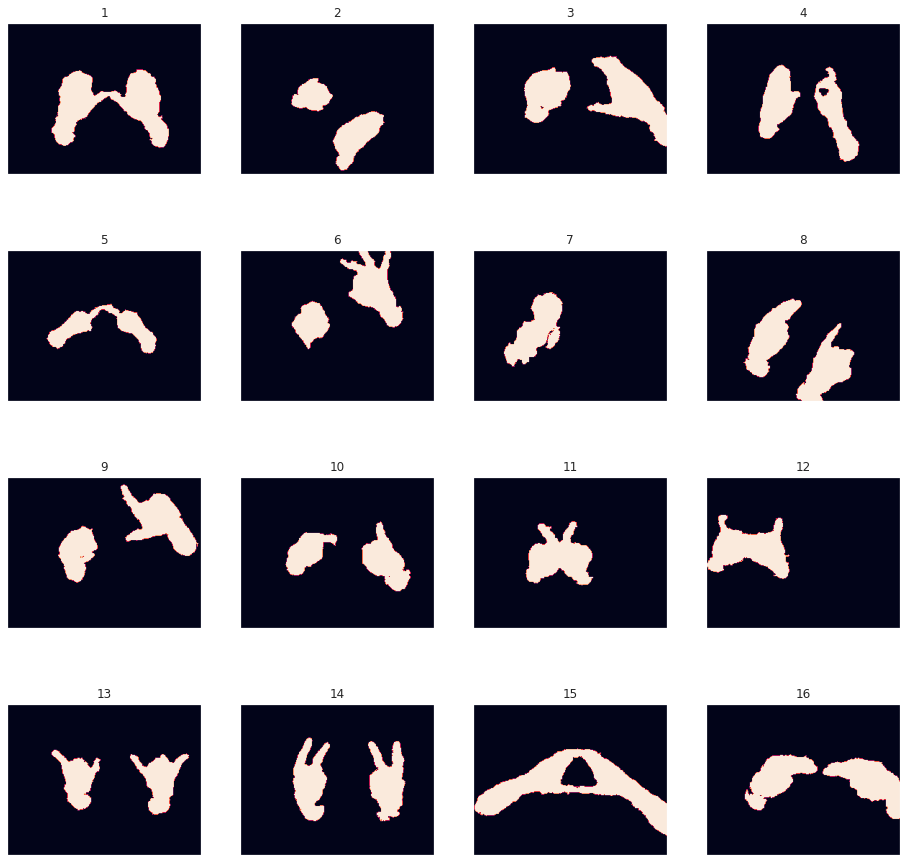

In [8]:
print("The 16 unique hand gestures of the dataset : \n\n")
fig, axes = plt.subplots(4, 4, figsize = (16, 16)) 

label_val = 1
for idx_row in range(4) : 
    for idx_col in range(4) :
        img_buff = df[ df['label'] == label_val ].reset_index(drop=True).iloc[0].to_frame().T
        img_buff = img_buff.values[0][2:]
        img_buff = np.int8(np.reshape(img_buff, (211, 271)))
        img = Image.fromarray(img_buff, 'L')
        
        axes[idx_row][idx_col].set_title(label_val); label_val+=1;
        axes[idx_row][idx_col].imshow(np.asarray(img))
        
        axes[idx_row][idx_col].axes.xaxis.set_visible(False)
        axes[idx_row][idx_col].axes.yaxis.set_visible(False)


plt.show()

# Preparing the data for training

In [9]:
ohe = OneHotEncoder(categories = u_labels.reshape(1, 16))

In [10]:
X = df.values[:, 2:]
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
X[0]

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
y = ohe.fit_transform(df['label'].values.reshape(-1, 1)).toarray().astype('int8')

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:82: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.categories != "auto":
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:93: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.categories == "auto":


In [19]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int8)

In [14]:
y.shape

(2999, 16)

In [15]:
y.dtype

dtype('int8')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [20]:
X_train.shape

(2099, 57181)

# Modeling

In [19]:
class HandGesturesClssifierCNN:
    def __init__(self):
        return 
    
    def generate_model(self):
        
        model = keras.Sequential([
            layers.Conv2D( filters = 32, kernel_size = (5,5), padding = 'SAME', activation ='relu', input_shape = X_train.shape ), 
            layers.MaxPooling2D((2, 2)),
            
            layers.Conv2D( 64, (3, 3), activation='relu' ),
            layers.MaxPooling2D((2, 2)),
            
            layers.Conv2D( 64, (3, 3), activation='relu' ),
            layers.MaxPooling2D((2, 2)),
            
            layers.Flatten(),
            layers.Dense( 128, activation = 'relu' ), 
            layers.Dense( 16, activation = 'softmax' )
        ])
        
        #compile
        model.compile(
            optimizer = 'adam',
            loss = 'categorical_crossentropy',
            metrics=['accuracy'],
        )
        
        return model
    
    def train_model():
        
        
        
        return 
    
    def format_pred():
        return 

In [21]:
model = keras.Sequential([
    layers.Dense( 512, activation = 'relu' , input_shape = [X_train.shape[1]]),
    layers.Dense( 128, activation = 'relu'), 
    layers.Dense( 16, activation = 'softmax' )
])
        

In [22]:
#compile
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

In [23]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

#train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=100,
    callbacks=[early_stopping],
)


Epoch 1/100
5/5 [==============================] - 6s 1s/step - loss: 1295.7469 - accuracy: 0.2125 - val_loss: 1142.1599 - val_accuracy: 0.4611
Epoch 2/100
5/5 [==============================] - 5s 1s/step - loss: 657.8966 - accuracy: 0.5993 - val_loss: 167.8159 - val_accuracy: 0.7711
Epoch 3/100
5/5 [==============================] - 5s 1s/step - loss: 127.3697 - accuracy: 0.7975 - val_loss: 62.4716 - val_accuracy: 0.8722
Epoch 4/100
5/5 [==============================] - 5s 1s/step - loss: 41.2174 - accuracy: 0.8928 - val_loss: 38.9852 - val_accuracy: 0.9122
Epoch 5/100
5/5 [==============================] - 5s 1s/step - loss: 12.6102 - accuracy: 0.9566 - val_loss: 25.1634 - val_accuracy: 0.9567
Epoch 6/100
5/5 [==============================] - 5s 1s/step - loss: 5.7948 - accuracy: 0.9781 - val_loss: 22.6759 - val_accuracy: 0.9533
Epoch 7/100
5/5 [==============================] - 5s 1s/step - loss: 2.9349 - accuracy: 0.9824 - val_loss: 17.6076 - val_accuracy: 0.9656
Epoch 8/100
5/5

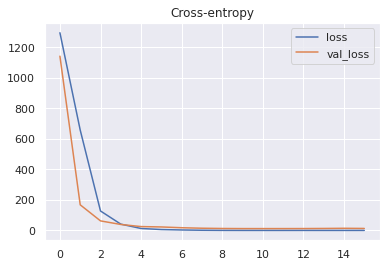

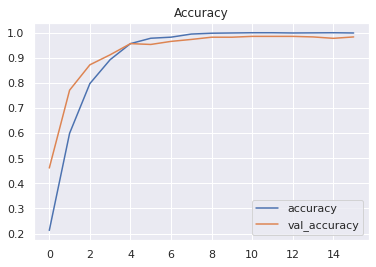

In [28]:
history = pd.DataFrame(history)
history.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

# Predicting

In [30]:
y_pred = model.predict(X_test)

In [31]:
y_pred

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
pred = list()
for i in range(len(y_pred)):
    pred.append( np.argmax(y_pred[i]) + 1)
test = list()
for i in range(len(y_test)):
    test.append( np.argmax(y_test[i]) + 1)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
a = accuracy_score(pred, test)
print("Accuracy :", a*100)

Accuracy : 98.55555555555556


In [35]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int8)

In [36]:
y_pred[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
      dtype=float32)